In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
from torch import nn

In [ ]:
class BaseColor(nn.Module):
	def __init__(self):
		super(BaseColor, self).__init__()

		self.l_cent = 50.
		self.l_norm = 100.
		self.ab_norm = 110.

	def normalize_l(self, in_l):
		return (in_l-self.l_cent)/self.l_norm

	def unnormalize_l(self, in_l):
		return in_l*self.l_norm + self.l_cent

	def normalize_ab(self, in_ab):
		return in_ab/self.ab_norm

	def unnormalize_ab(self, in_ab):
		return in_ab*self.ab_norm

In [ ]:
import numpy as np
from IPython import embed

In [ ]:
class ECCVGenerator(BaseColor):
    def __init__(self, norm_layer=nn.BatchNorm2d):
        super(ECCVGenerator, self).__init__()

        model1=[nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]

        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=2, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]

        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]

        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        model8=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]

        model8+=[nn.Conv2d(256, 313, kernel_size=1, stride=1, padding=0, bias=True),]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8 = nn.Sequential(*model8)

        self.softmax = nn.Softmax(dim=1)
        self.model_out = nn.Conv2d(313, 2, kernel_size=1, padding=0, dilation=1, stride=1, bias=False)
        self.upsample4 = nn.Upsample(scale_factor=4, mode='bilinear')

    def forward(self, input_l):
        conv1_2 = self.model1(self.normalize_l(input_l))
        conv2_2 = self.model2(conv1_2)
        conv3_3 = self.model3(conv2_2)
        conv4_3 = self.model4(conv3_3)
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)
        conv8_3 = self.model8(conv7_3)
        out_reg = self.model_out(self.softmax(conv8_3))

        return self.unnormalize_ab(self.upsample4(out_reg))

In [ ]:
def eccv16():
	model = ECCVGenerator()
	if(True):
		model.load_state_dict(model_zoo.load_url('https://colorizers.s3.us-east-2.amazonaws.com/colorization_release_v2-9b330a0b.pth',map_location='cpu',check_hash=True))
		print(model)
	print("----------------------------------------")
	return model

In [ ]:
class SIGGRAPHGenerator(BaseColor):
    def __init__(self, norm_layer=nn.BatchNorm2d, classes=529):
        super(SIGGRAPHGenerator, self).__init__()

        # Conv1
        model1=[nn.Conv2d(4, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=True),]
        model1+=[nn.ReLU(True),]
        model1+=[norm_layer(64),]
        # add a subsampling operation

        # Conv2
        model2=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model2+=[nn.ReLU(True),]
        model2+=[norm_layer(128),]
        # add a subsampling layer operation

        # Conv3
        model3=[nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model3+=[nn.ReLU(True),]
        model3+=[norm_layer(256),]
        # add a subsampling layer operation

        # Conv4
        model4=[nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model4+=[nn.ReLU(True),]
        model4+=[norm_layer(512),]

        # Conv5
        model5=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model5+=[nn.ReLU(True),]
        model5+=[norm_layer(512),]

        # Conv6
        model6=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[nn.Conv2d(512, 512, kernel_size=3, dilation=2, stride=1, padding=2, bias=True),]
        model6+=[nn.ReLU(True),]
        model6+=[norm_layer(512),]

        # Conv7
        model7=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True),]
        model7+=[nn.ReLU(True),]
        model7+=[norm_layer(512),]

        # Conv7
        model8up=[nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1, bias=True)]
        model3short8=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]

        model8=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True),]
        model8+=[nn.ReLU(True),]
        model8+=[norm_layer(256),]

        # Conv9
        model9up=[nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1, bias=True),]
        model2short9=[nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        # add the two feature maps above        

        model9=[nn.ReLU(True),]
        model9+=[nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        model9+=[nn.ReLU(True),]
        model9+=[norm_layer(128),]

        # Conv10
        model10up=[nn.ConvTranspose2d(128, 128, kernel_size=4, stride=2, padding=1, bias=True),]
        model1short10=[nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True),]
        # add the two feature maps above

        model10=[nn.ReLU(True),]
        model10+=[nn.Conv2d(128, 128, kernel_size=3, dilation=1, stride=1, padding=1, bias=True),]
        model10+=[nn.LeakyReLU(negative_slope=.2),]

        # classification output
        model_class=[nn.Conv2d(256, classes, kernel_size=1, padding=0, dilation=1, stride=1, bias=True),]

        # regression output
        model_out=[nn.Conv2d(128, 2, kernel_size=1, padding=0, dilation=1, stride=1, bias=True),]
        model_out+=[nn.Tanh()]

        self.model1 = nn.Sequential(*model1)
        self.model2 = nn.Sequential(*model2)
        self.model3 = nn.Sequential(*model3)
        self.model4 = nn.Sequential(*model4)
        self.model5 = nn.Sequential(*model5)
        self.model6 = nn.Sequential(*model6)
        self.model7 = nn.Sequential(*model7)
        self.model8up = nn.Sequential(*model8up)
        self.model8 = nn.Sequential(*model8)
        self.model9up = nn.Sequential(*model9up)
        self.model9 = nn.Sequential(*model9)
        self.model10up = nn.Sequential(*model10up)
        self.model10 = nn.Sequential(*model10)
        self.model3short8 = nn.Sequential(*model3short8)
        self.model2short9 = nn.Sequential(*model2short9)
        self.model1short10 = nn.Sequential(*model1short10)

        self.model_class = nn.Sequential(*model_class)
        self.model_out = nn.Sequential(*model_out)

        self.upsample4 = nn.Sequential(*[nn.Upsample(scale_factor=4, mode='bilinear'),])
        self.softmax = nn.Sequential(*[nn.Softmax(dim=1),])

    def forward(self, input_A, input_B=None, mask_B=None):
        if(input_B is None):
            input_B = torch.cat((input_A*0, input_A*0), dim=1)
        if(mask_B is None):
            mask_B = input_A*0

        conv1_2 = self.model1(torch.cat((self.normalize_l(input_A),self.normalize_ab(input_B),mask_B),dim=1))
        conv2_2 = self.model2(conv1_2[:,:,::2,::2])
        conv3_3 = self.model3(conv2_2[:,:,::2,::2])
        conv4_3 = self.model4(conv3_3[:,:,::2,::2])
        conv5_3 = self.model5(conv4_3)
        conv6_3 = self.model6(conv5_3)
        conv7_3 = self.model7(conv6_3)

        conv8_up = self.model8up(conv7_3) + self.model3short8(conv3_3)
        conv8_3 = self.model8(conv8_up)
        conv9_up = self.model9up(conv8_3) + self.model2short9(conv2_2)
        conv9_3 = self.model9(conv9_up)
        conv10_up = self.model10up(conv9_3) + self.model1short10(conv1_2)
        conv10_2 = self.model10(conv10_up)
        out_reg = self.model_out(conv10_2)

        conv9_up = self.model9up(conv8_3) + self.model2short9(conv2_2)
        conv9_3 = self.model9(conv9_up)
        conv10_up = self.model10up(conv9_3) + self.model1short10(conv1_2)
        conv10_2 = self.model10(conv10_up)
        out_reg = self.model_out(conv10_2)

        return self.unnormalize_ab(out_reg)


In [ ]:
def siggraph17():
    model = SIGGRAPHGenerator()
    if(True):
        model.load_state_dict(model_zoo.load_url('https://colorizers.s3.us-east-2.amazonaws.com/siggraph17-df00044c.pth',map_location='cpu',check_hash=True))
        print(model)
    return model

In [ ]:
from PIL import Image
from skimage import color
import torch.nn.functional as F
from IPython import embed

In [ ]:
def load_img(img_path):
	out_np = np.asarray(Image.open(img_path))
	if(out_np.ndim==2):
		out_np = np.tile(out_np[:,:,None],3)
	return out_np

In [ ]:
def resize_img(img, HW=(256,256), resample=3):
	return np.asarray(Image.fromarray(img).resize((HW[1],HW[0]), resample=resample))

In [ ]:
j = 1
def preprocess_img(img_rgb_orig, HW=(256,256), resample=3):
	# return original size L and resized L as torch Tensors
	img_rgb_rs = resize_img(img_rgb_orig, HW=HW, resample=resample)
	
	img_lab_orig = color.rgb2lab(img_rgb_orig)
	img_lab_rs = color.rgb2lab(img_rgb_rs)

	img_l_orig = img_lab_orig[:,:,0]
	img_l_rs = img_lab_rs[:,:,0]

	tens_orig_l = torch.Tensor(img_l_orig)[None,None,:,:]
	tens_rs_l = torch.Tensor(img_l_rs)[None,None,:,:]

	b = tens_rs_l.detach().numpy()
	global j
	np.save("/content/gdrive/MyDrive/Downloads/After Preprocess/" + str(j),tens_rs_l)
	j+=1


	return (tens_orig_l, tens_rs_l)


In [ ]:
i = 1
def postprocess_tens(tens_orig_l, out_ab, mode='bilinear'):
	# tens_orig_l 	1 x 1 x H_orig x W_orig
	# out_ab 		1 x 2 x H x W

	HW_orig = tens_orig_l.shape[2:]
	HW = out_ab.shape[2:]

	# call resize function if needed
	if(HW_orig[0]!=HW[0] or HW_orig[1]!=HW[1]):
		out_ab_orig = F.interpolate(out_ab, size=HW_orig, mode='bilinear')
	else:
		out_ab_orig = out_ab

	out_lab_orig = torch.cat((tens_orig_l, out_ab_orig), dim=1)

	b = out_ab.detach().numpy()
	global i
	np.save("/content/gdrive/MyDrive/Downloads/Before Post Process/" + str(i),b)
	i+=1

 
	return color.lab2rgb(out_lab_orig.data.cpu().numpy()[0,...].transpose((1,2,0)))

In [ ]:
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

In [ ]:
import torch.utils.model_zoo as model_zoo

In [ ]:
import pathlib
x=list(pathlib.Path('/content/drive/MyDrive/Downloads/After Preprocess').glob('*.jpg'))
from torch.utils.data import DataLoader


In [ ]:
image_path_in=list(pathlib.Path('/content/drive/MyDrive/Downloads/After Preprocess').glob('*.npy'))
ǐmage_path_output=list(pathlib.Path('/content/drive/MyDrive/Downloads/Before Post Process').glob('*.npy'))

In [ ]:
class LandmarkDataset(Dataset):
    def __init__(self, image_paths_in,image_paths_out, transform=False):
        self.image_paths_in = image_paths_in
        self.image_paths_out = image_paths_out
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths_in)

    def __getitem__(self, idx):
        image_filepath = str(self.image_paths_in[idx])
        img_out_path=str(self.image_paths_out[idx])
        image =  np.load(image_filepath)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        label = np.load(img_out_path)
        
        
        return image, label

In [ ]:
import cv2

In [ ]:
# load colorizers
colorizer_eccv16 = eccv16().eval()
colorizer_siggraph17 = siggraph17().eval()
if(True):
	colorizer_eccv16.cuda()
	colorizer_siggraph17.cuda()

ECCVGenerator(
  (model1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=Tru

Downloading: "https://colorizers.s3.us-east-2.amazonaws.com/siggraph17-df00044c.pth" to /root/.cache/torch/hub/checkpoints/siggraph17-df00044c.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

SIGGRAPHGenerator(
  (model1): Sequential(
    (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace

In [ ]:
# default size to process images is 256x256
# grab L channel in both original ("orig") and resized ("rs") resolutions
img = load_img('/content/drive/MyDrive/Downloads/bnw dataset/black and white portraits/black and white portraits1.jpg')

(tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))
# if(True):
# 	tens_l_rs = tens_l_rs.cuda()

In [ ]:
# colorizer outputs 256x256 ab map
# resize and concatenate to original L channel
img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())
out_img_siggraph17 = postprocess_tens(tens_l_orig, colorizer_siggraph17(tens_l_rs).cpu())

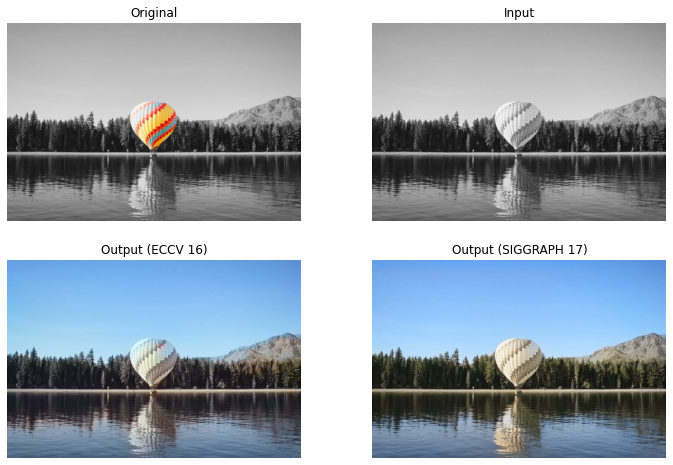

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_bw)
plt.title('Input')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(out_img_eccv16)
plt.title('Output (ECCV 16)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(out_img_siggraph17)
plt.title('Output (SIGGRAPH 17)')
plt.axis('off')
plt.show()

In [ ]:
# assign directory
import os
import cv2
directory = '/content/gdrive/MyDrive/Downloads/bnw dataset/black and white landscape'

# iterate over files in
# that directory
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
	# checking if it is a file
  if os.path.isfile(f):
    # print(f)
    ImagePath=f
    
    img = load_img(ImagePath)
    (tens_l_orig, tens_l_rs) = preprocess_img(img, HW=(256,256))
    if(True):
      tens_l_rs = tens_l_rs.cuda()
    # colorizer outputs 256x256 ab map
    # resize and concatenate to original L channel
    img_bw = postprocess_tens(tens_l_orig, torch.cat((0*tens_l_orig,0*tens_l_orig),dim=1))
    out_img_eccv16 = postprocess_tens(tens_l_orig, colorizer_eccv16(tens_l_rs).cpu())
    out_img_siggraph17 = postprocess_tens(tens_l_orig, colorizer_siggraph17(tens_l_rs).cpu())

    plt.figure(figsize=(12,8))
    plt.subplot(2,2,1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2,2,2)
    plt.imshow(img_bw)
    plt.title('Input')
    plt.axis('off')

    plt.subplot(2,2,3)
    plt.imshow(out_img_eccv16)
    plt.title('Output (ECCV 16)')
    plt.axis('off')

    plt.subplot(2,2,4)
    plt.imshow(out_img_siggraph17)
    plt.title('Output (SIGGRAPH 17)')
    plt.axis('off')
    plt.show()

In [ ]:
ev=eccv16()
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data[0])
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights

learning_rate = 0.0001
optimizer = torch.optim.Adam(ev.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []
train_dataset=LandmarkDataset(image_paths_in=image_path_in,image_paths_out=ǐmage_path_output)
train_loader = DataLoader(
    train_dataset, 
)

valid_loader = DataLoader(
    train_dataset, 
)

epochs = 100
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(ev, train_loader, optimizer)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)


ECCVGenerator(
  (model1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (model3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=Tru

In [ ]:
sig=siggraph17()
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data[0])
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights

learning_rate = 0.0001
optimizer = torch.optim.Adam(sig.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []
train_dataset=LandmarkDataset(image_paths_in=image_path_in,image_paths_out=ǐmage_path_output)
train_loader = DataLoader(
    train_dataset, 
)

valid_loader = DataLoader(
    train_dataset, 
)

epochs = 100
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(sig, train_loader, optimizer)
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
